In [2]:
import random
from typing import Dict, Type

import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)

def coerce_types(df: pd.DataFrame, type_dict: Dict[str, Type]) -> pd.DataFrame:
    df = df.copy()
    for col_name, stored_type in type_dict.items():
        df[col_name] = df[col_name].apply(lambda x : stored_type(x))
    return df

In [3]:
names = ["Dog_" + str(i) for i in range(1, 31)]
ages = np.random.randint(1, 15, 30)
sexes = random.choices(['Male', 'Female'], k=30)
breeds = random.choices(['Bulldog', 'Labrador', 'Chihuahua', 'Beagle'], k=30)
colors = random.choices(['Black', 'White', 'Brown', 'Grey'], k=30)
toys = random.choices(['Ball', 'Frisbee', 'Rope', 'Bone'], k=30)

df = pd.DataFrame(list(zip(names, ages, sexes, breeds, colors, toys)), 
               columns =['Name', 'Age', 'Sex', 'Breed', 'Color', 'Favourite Toy'])

df


,Name,Age,Sex,Breed,Color,Favourite Toy
0,Dog_1,13,Female,Labrador,Grey,Bone
1,Dog_2,6,Female,Beagle,Brown,Rope
2,Dog_3,1,Male,Labrador,Grey,Frisbee
3,Dog_4,4,Male,Beagle,Brown,Rope
4,Dog_5,12,Female,Chihuahua,Brown,Bone
5,Dog_6,4,Male,Bulldog,White,Bone
6,Dog_7,8,Female,Chihuahua,Brown,Bone
7,Dog_8,10,Male,Labrador,White,Ball
8,Dog_9,4,Male,Beagle,Brown,Rope
9,Dog_10,6,Female,Chihuahua,White,Frisbee


In [4]:
from ipyaggrid import Grid
from ipywidgets import widgets, Layout

# Setting up the grid
grid_options = {
    'columnDefs' : [{'field': c} for c in df.columns],
    'enableSorting': True, 
    'enableFilter': True, 
}

cached_types = {col_name: type(df[col_name].iloc[0]) for col_name in df.columns}

g = Grid(grid_data=df,
         grid_options=grid_options,
         show_toggle_edit=True,
         theme='ag-theme-balham',
         quick_filter=True,
         sync_on_edit=True, 
         export_mode='auto',
         index=True,
         keep_multiindex=False)

g


Grid(columns_fit='size_to_fit', compress_data=True, export_mode='auto', height='350px', menu={'buttons': [], '…

In [5]:
df_updated = g.grid_data_out['grid']
df_updated = coerce_types(df_updated, cached_types)

df_updated


,Name,Age,Sex,Breed,Color,Favourite Toy
Index,,,,,,
0,Dog_1,10,Female,Labrador,Grey,Bone
1,Dog_2,6,Female,Beagle,Brown,Rope
2,Dog_3,1,Male,Labrador,Grey,Frisbee
3,Dog_4,4,Male,Beagle,Brown,Rope
4,Dog_5,12,Female,Chihuahua,Brown,Bone
5,Dog_6,4,Male,Bulldog,White,Bone
6,Dog_7,8,Female,Chihuahua,Brown,Bone
7,Dog_8,10,Male,Labrador,White,Ball
8,Dog_9,4,Male,Beagle,Brown,Rope


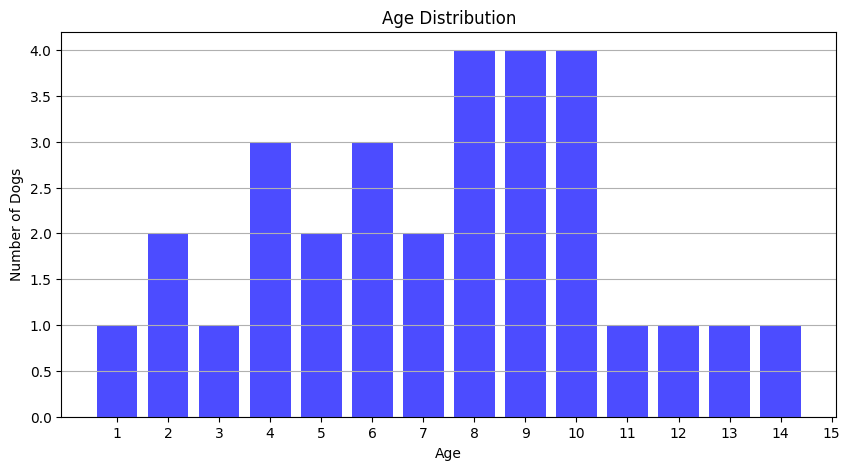

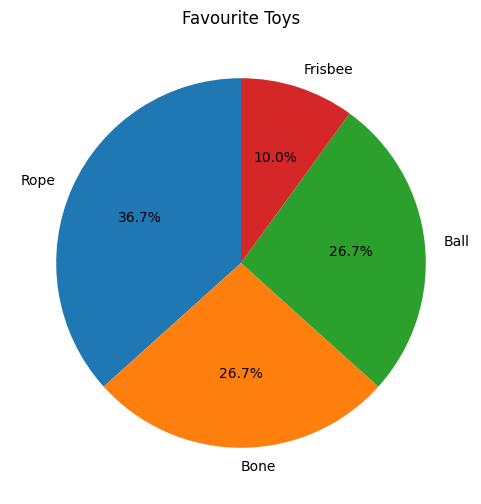

In [6]:
import matplotlib.pyplot as plt

# Bar chart for age distribution
plt.figure(figsize=(10, 5))
plt.hist(df_updated['Age'], bins=range(1, 16), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Dogs')
plt.xticks(range(1, 16))
plt.grid(axis='y')
plt.show()

# Pie chart for favourite toys
toy_counts = df_updated['Favourite Toy'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(toy_counts, labels=toy_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Favourite Toys')
plt.show()
